In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("Human_activity_Dataset.csv")
df.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject/Participant,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING


In [53]:
print(df.shape)
print(df.describe())

(10299, 563)
       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count       10299.000000       10299.000000       10299.000000   
mean            0.274347          -0.017743          -0.108925   
std             0.067628           0.037128           0.053033   
min            -1.000000          -1.000000          -1.000000   
25%             0.262625          -0.024902          -0.121019   
50%             0.277174          -0.017162          -0.108596   
75%             0.288354          -0.010625          -0.097589   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count      10299.000000      10299.000000      10299.000000      10299.000000   
mean          -0.607784         -0.510191         -0.613064         -0.633593   
std            0.438694          0.500240          0.403657          0.413333   
min           -1.000000         -1.000000         -1.000000         

In [55]:
# copy the data
y_df = df['Activity']
X_df = df.drop(columns = ['Activity', 'subject/Participant'])

df_min_max_scaled = X_df.copy()
  
# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  
# view normalized data
print(df_min_max_scaled)

       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0               0.644292           0.489853           0.433547   
1               0.639209           0.491795           0.438240   
2               0.639827           0.490266           0.443269   
3               0.639587           0.486900           0.438359   
4               0.638314           0.491715           0.442319   
...                  ...                ...                ...   
10294           0.655077           0.473304           0.450446   
10295           0.681692           0.480393           0.447042   
10296           0.674983           0.515039           0.442106   
10297           0.618797           0.509233           0.451751   
10298           0.576814           0.490782           0.431491   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0              0.002361          0.008445          0.043237          0.002444   
1              0.000877          0.012350    

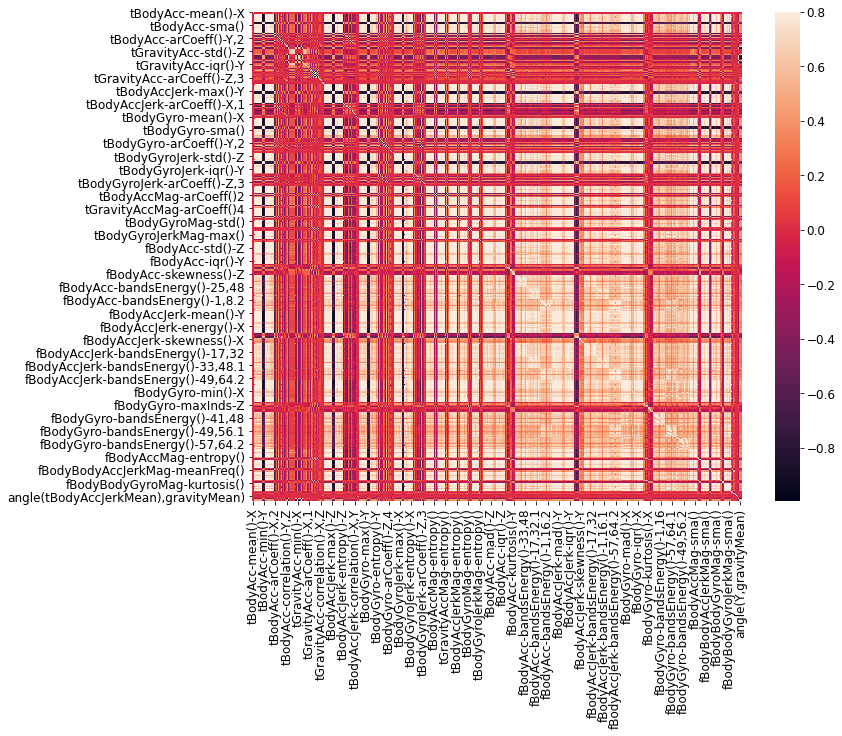

In [92]:
import seaborn as sns
# Correlation matrix
corrmat = df_min_max_scaled.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [93]:
cormat = df_min_max_scaled.corr()
round(cormat,2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.00,0.13,-0.23,0.00,-0.02,-0.04,0.01,-0.02,-0.04,0.05,...,0.03,-0.01,-0.00,-0.55,0.02,0.04,0.03,-0.04,0.03,0.03
tBodyAcc-mean()-Y,0.13,1.00,-0.03,-0.05,-0.05,-0.05,-0.05,-0.05,-0.06,-0.04,...,-0.01,-0.00,-0.00,0.08,-0.03,0.01,0.08,-0.01,-0.01,-0.02
tBodyAcc-mean()-Z,-0.23,-0.03,1.00,-0.02,-0.02,-0.02,-0.02,-0.02,-0.01,-0.04,...,-0.02,0.02,0.02,0.06,-0.04,-0.07,-0.03,0.00,-0.01,-0.03
tBodyAcc-std()-X,0.00,-0.05,-0.02,1.00,0.92,0.86,1.00,0.92,0.86,0.98,...,-0.07,0.17,0.14,-0.03,-0.02,0.03,-0.03,-0.37,0.45,0.39
tBodyAcc-std()-Y,-0.02,-0.05,-0.02,0.92,1.00,0.89,0.92,1.00,0.89,0.91,...,-0.11,0.22,0.19,-0.02,-0.01,0.00,-0.02,-0.38,0.51,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.04,0.01,-0.07,0.03,0.00,-0.00,0.03,-0.00,-0.01,0.03,...,-0.03,0.04,0.04,-0.01,0.01,1.00,-0.11,-0.01,-0.01,-0.02
"angle(tBodyGyroJerkMean,gravityMean)",0.03,0.08,-0.03,-0.03,-0.02,-0.01,-0.03,-0.01,-0.01,-0.03,...,-0.00,-0.01,-0.01,-0.03,0.02,-0.11,1.00,0.02,-0.00,-0.01
"angle(X,gravityMean)",-0.04,-0.01,0.00,-0.37,-0.38,-0.35,-0.37,-0.38,-0.36,-0.38,...,0.09,-0.09,-0.08,0.01,0.02,-0.01,0.02,1.00,-0.75,-0.64
"angle(Y,gravityMean)",0.03,-0.01,-0.01,0.45,0.51,0.46,0.44,0.51,0.46,0.46,...,-0.11,0.09,0.08,0.00,-0.01,-0.01,-0.00,-0.75,1.00,0.55


In [60]:
print("Data: {}".format(df.shape))
print("Null values present in data: {}".format(df.isnull().values.any()))

Data: (10299, 563)
Null values present in data: False


In [61]:
# Get X and y 
y_df = df['Activity']
X_df = df.drop(columns = ['Activity', 'subject/Participant'])

([<matplotlib.patches.Wedge at 0x1c88b631d00>,
 [Text(0.912197696055357, 0.6147319442743304, 'LAYING'),
  Text(-0.21486667196758633, 1.0788106012074472, 'SITTING'),
  Text(-1.065601489034256, 0.2729349126952738, 'STANDING'),
  Text(-0.7531828672782088, -0.8016954337144352, 'WALKING'),
  Text(0.2636606321506688, -1.0679340199908935, 'WALKING_DOWNSTAIRS'),
  Text(1.000373282280183, -0.4574421232243195, 'WALKING_UPSTAIRS')],
 [Text(0.49756237966655836, 0.3353083332405438, '18.88'),
  Text(-0.1172000028914107, 0.5884421461131529, '18.51'),
  Text(-0.5812371758368668, 0.1488735887428766, '17.25'),
  Text(-0.41082701851538656, -0.43728841838969185, '16.72'),
  Text(0.14381489026400116, -0.5825094654495782, '14.99'),
  Text(0.5456581539710088, -0.24951388539508332, '13.65')])

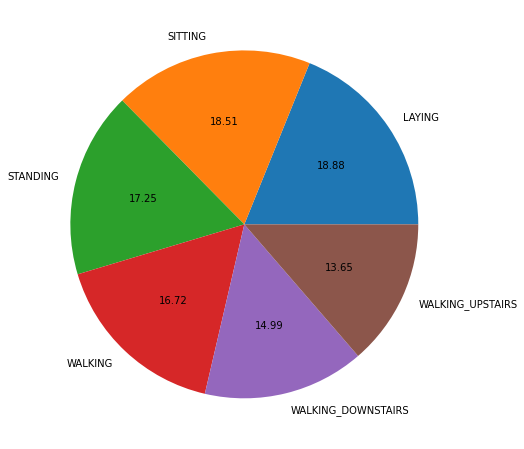

In [106]:
count_of_each_activity = np.array(y_df.value_counts())
activities = sorted(y_df.unique())
# Plot a pie chart for different activities
plt.rcParams.update({'figure.figsize': [8, 8], 'font.size': 10})
plt.pie(count_of_each_activity, labels =activities, autopct = '%1.2f')

In [98]:
# Case 1 : Train = 80 % Test = 20%  [ x_train1,y_train1] = 80% ; [ x_test1,y_test1] = 20% ;
x_train1,x_test1,y_train1,y_test1 = train_test_split(X_df, y_df, test_size=0.20, random_state=42)


# Case 2 : Train = 10 % Test = 90%  [ x_train2,y_train2] = 10% ; [ x_test2,y_test2] = 90% ;
x_train2,x_test2,y_train2,y_test2 = train_test_split(X_df, y_df, test_size=0.90, random_state=42)


# For Case1
print("Case 1 Training Data: {}".format(x_train1.shape))
print("Case 1 Testing Data: {}".format(x_test1.shape))
print("Null values present in training data: {}".format(x_train1.isnull().values.any()))

# For Case2
print("Case 2 Training Data: {}".format(x_train2.shape))
print("Case 2 Testing Data: {}".format(x_test2.shape))
print("Null values present in training data: {}".format(x_train2.isnull().values.any()))

Case 1 Training Data: (8239, 561)
Case 1 Testing Data: (2060, 561)
Null values present in training data: False
Case 2 Training Data: (1029, 561)
Case 2 Testing Data: (9270, 561)
Null values present in training data: False


In [110]:
accuracy_scores = np.zeros(4)
log_reg =LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [122]:
# Model Development using Logistic Regression with penalty='l2',C=0.01 for Case-1
clf = log_reg.fit(x_train1, y_train1)
prediction1 = clf.predict(x_test1)
print(classification_report(y_test1, prediction1, digits=3))
accuracy_scores[1] = accuracy_score(y_test1, prediction1)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))
print('Accuracy on the training subset: {:.3f}'.format(log_reg.score(x_train1, y_train1)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg.score(x_test1, y_test1)))

                    precision    recall  f1-score   support

            LAYING      0.985     1.000     0.993       406
           SITTING      0.922     0.849     0.884       377
          STANDING      0.869     0.921     0.894       354
           WALKING      0.981     0.978     0.980       369
WALKING_DOWNSTAIRS      0.972     0.965     0.968       284
  WALKING_UPSTAIRS      0.949     0.970     0.960       270

          accuracy                          0.946      2060
         macro avg      0.946     0.947     0.946      2060
      weighted avg      0.946     0.946     0.946      2060

Logistic Regression accuracy: 94.6116504854369%
Accuracy on the training subset: 0.948
Accuracy on the test subset: 0.946


In [123]:
# Model Development using Logistic Regression with penalty='l2',C=0.01 for Case-2
clf = log_reg.fit(x_train2, y_train2)
prediction2 = clf.predict(x_test2)
print(classification_report(y_test2, prediction2, digits=3))
accuracy_scores[1] = accuracy_score(y_test2, prediction2)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))
print('Accuracy on the training subset: {:.3f}'.format(log_reg.score(x_train2, y_train2)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg.score(x_test2, y_test2)))

                    precision    recall  f1-score   support

            LAYING      0.977     0.998     0.987      1740
           SITTING      0.801     0.794     0.797      1582
          STANDING      0.836     0.816     0.826      1728
           WALKING      0.978     0.948     0.963      1567
WALKING_DOWNSTAIRS      0.959     0.924     0.941      1266
  WALKING_UPSTAIRS      0.895     0.968     0.930      1387

          accuracy                          0.906      9270
         macro avg      0.908     0.908     0.908      9270
      weighted avg      0.906     0.906     0.906      9270

Logistic Regression accuracy: 90.62567421790723%
Accuracy on the training subset: 0.914
Accuracy on the test subset: 0.906


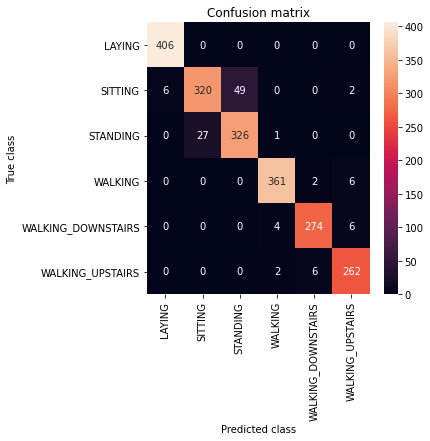

In [127]:
# printing the confusion matrix
conf_matrix = confusion_matrix(y_test1, prediction1)
plt.figure(figsize =(5, 5))
sns.heatmap(conf_matrix, xticklabels = activities, 
            yticklabels = activities, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()